<a href="https://colab.research.google.com/github/Otavio8888/macroeconometric/blob/payroll_USA/payroll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Payroll norte-americano com Python
---

## Bibliotecas

In [1]:
import pandas as pd
from plotnine import *

## Coleta de dados

In [2]:
df = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=PAYEMS")
df.tail()

,observation_date,PAYEMS
1039,2025-08-01,159485
1040,2025-09-01,159593
1041,2025-10-01,159420
1042,2025-11-01,159476
1043,2025-12-01,159526


## Tratamento de dados

In [3]:
df_plot = (
    df
    .rename(columns = {"observation_date": "date", "PAYEMS": "payroll"})
    .sort_values("date")
    .assign(
        date = lambda x: pd.to_datetime(x["date"]),
        variacao = lambda x: (x["payroll"] - x["payroll"].shift(1)),
        positivo = lambda x: x.variacao > 0
        )
    .query("date >= @pd.to_datetime('2024-01-01')")
    .assign(variacao = lambda x: x.variacao.astype(int))
)
df_plot.tail()

,date,payroll,variacao,positivo
1039,2025-08-01,159485,-26,False
1040,2025-09-01,159593,108,True
1041,2025-10-01,159420,-173,False
1042,2025-11-01,159476,56,True
1043,2025-12-01,159526,50,True


## Visualização de dados

/usr/local/lib/python3.12/dist-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


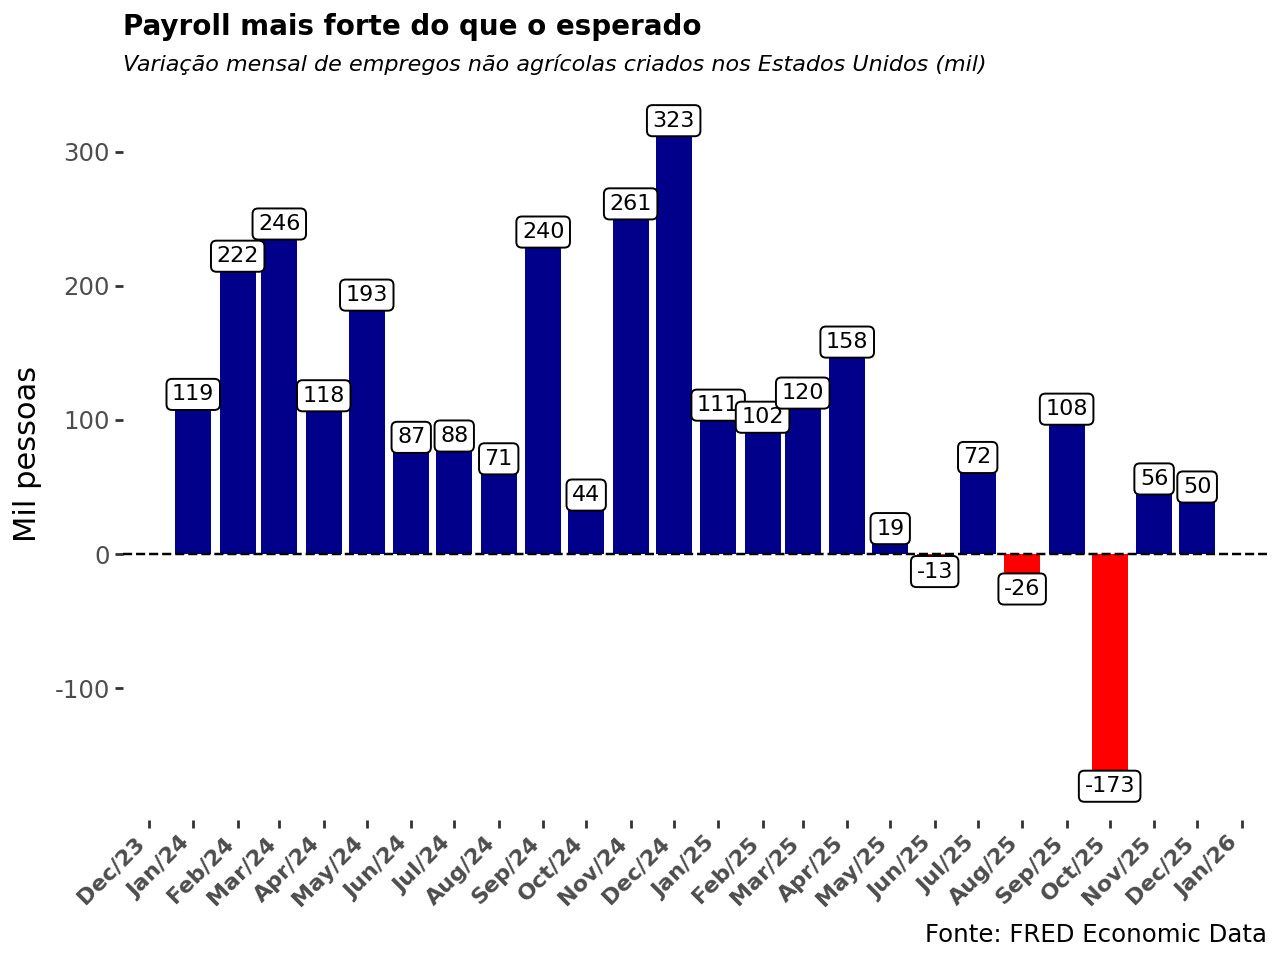

In [5]:
(
    ggplot(df_plot) +
    aes("date", "variacao", fill = "positivo", label = "variacao") +
    geom_bar(stat = "identity") +
    geom_label(color = "black", fill = "white", size = 8, va = "center") +
    geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
    scale_x_date(date_breaks = "1 month", date_labels = "%b/%y") +
    scale_fill_manual(values = {True: "darkblue", False: "red"}) +
    guides(fill = False) +
    labs(
        title = "Payroll mais forte do que o esperado",
        subtitle = "Variação mensal de empregos não agrícolas criados nos Estados Unidos (mil)",
        x = "",
        y = "Mil pessoas",
        caption = "Fonte: FRED Economic Data"
    ) +
    theme(
        axis_text_x = element_text(rotation=45, hjust = 1, size=8, weight = "bold"),
        plot_title=element_text(size = 10, weight = "bold"),
        plot_subtitle=element_text(size = 8, style = "italic"),
        panel_background = element_rect(fill = "white", color = "white"),
    )
)